In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw,
    test_size=0.4,
    random_state=20200502
)

In [7]:
clf = ensemble.RandomForestClassifier(random_state=20200502)

print('The model:\n')
display(clf)
print()

print('The training time:\n')
%time clf.fit(X_train, y_train)
print()

y_train_hat = clf.predict(X_train)

print('The training set metrics:\n')
print(metrics.classification_report(y_train, y_train_hat))

y_test_hat = clf.predict(X_test)

print('The testing set metrics:\n')
print(metrics.classification_report(y_test, y_test_hat))

clf_rfc = clf

The model:



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20200502,
                       verbose=0, warm_start=False)


The training time:

CPU times: user 154 ms, sys: 3.72 ms, total: 158 ms
Wall time: 159 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       330
         1.0       1.00      1.00      1.00       236

    accuracy                           1.00       566
   macro avg       1.00      1.00      1.00       566
weighted avg       1.00      1.00      1.00       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       221
         1.0       0.88      0.88      0.88       157

    accuracy                           0.90       378
   macro avg       0.90      0.90      0.90       378
weighted avg       0.90      0.90      0.90       378



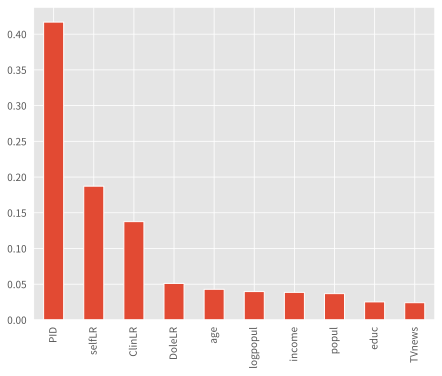

In [8]:
s = pd.Series(clf_rfc.feature_importances_,
              index=df_X.columns)
s = s.sort_values(ascending=False)
s.plot.bar()

In [9]:
clf = clf_rfc
s = pd.Series(dict(popul=0, TVnews=0, selfLR=3, ClinLR=2, DoleLR=6, PID=2,
                   age=28, educ=5, income=12, logpopul=-2.302585))
df = s.to_frame().T
display(df,
        clf.predict(df),
        clf.predict_proba(df))
df_single = df

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,logpopul
0,0.0,0.0,3.0,2.0,6.0,2.0,28.0,5.0,12.0,-2.302585


array([0.])

array([[1., 0.]])

In [10]:
import shap
shap.initjs()

 98%|===================| 742/756 [00:28<00:00]        

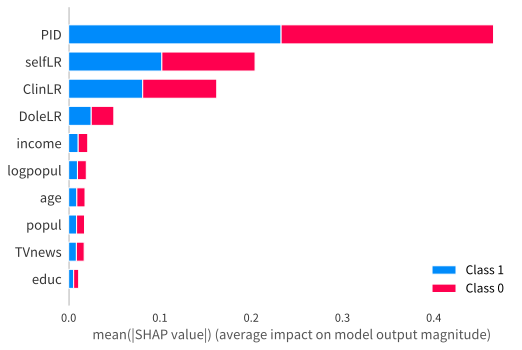

In [11]:
explainer = shap.TreeExplainer(clf_rfc, X_train)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test)  # it takes time

with mpl.rc_context(rc={'axes.facecolor': 'white', 'axes.grid': False}):
    shap.summary_plot(shap_values,
                      X_test,
                      feature_names=df_X.columns)

display(shap.force_plot(expected_value[0],
                        shap_values[0],
                        X_test,
                        feature_names=df_X.columns))

display(shap.force_plot(expected_value[1],
                        shap_values[1],
                        X_test,
                        feature_names=df_X.columns))

In [12]:
clf = ensemble.GradientBoostingClassifier(random_state=20200502)

print('The model:\n')
display(clf)
print()

print('The training time:\n')
%time clf.fit(X_train, y_train)
print()

y_train_hat = clf.predict(X_train)

print('The training set metrics:\n')
print(metrics.classification_report(y_train, y_train_hat))

y_test_hat = clf.predict(X_test)

print('The testing set metrics:\n')
print(metrics.classification_report(y_test, y_test_hat))

clf_gbc = clf

The model:



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=20200502, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


The training time:

CPU times: user 114 ms, sys: 1.9 ms, total: 116 ms
Wall time: 118 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       330
         1.0       0.99      0.98      0.99       236

    accuracy                           0.99       566
   macro avg       0.99      0.99      0.99       566
weighted avg       0.99      0.99      0.99       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       221
         1.0       0.86      0.89      0.87       157

    accuracy                           0.89       378
   macro avg       0.89      0.89      0.89       378
weighted avg       0.89      0.89      0.89       378



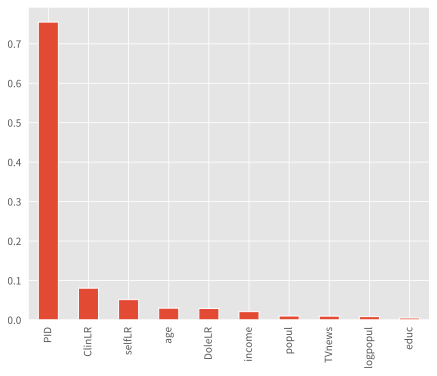

In [13]:
s = pd.Series(clf_gbc.feature_importances_,
              index=df_X.columns)
s = s.sort_values(ascending=False)
s.plot.bar()

In [14]:
clf = clf_gbc
s = pd.Series(dict(popul=0, TVnews=0, selfLR=3, ClinLR=2, DoleLR=6, PID=2,
                   age=28, educ=5, income=12, logpopul=-2.302585))
df = s.to_frame().T
display(df,
        clf.predict(df),
        clf.predict_proba(df))
df_single = df

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,logpopul
0,0.0,0.0,3.0,2.0,6.0,2.0,28.0,5.0,12.0,-2.302585


array([0.])

array([[0.99794, 0.00206]])

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


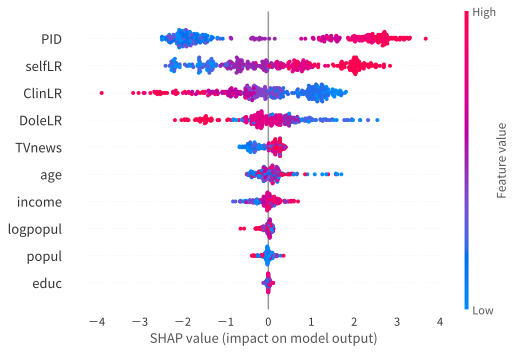

In [15]:
explainer = shap.TreeExplainer(clf_gbc, X_train)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test)  # it takes time

with mpl.rc_context(rc={'axes.facecolor': 'white', 'axes.grid': False}):
    shap.summary_plot(shap_values,
                      X_test,
                      feature_names=df_X.columns)

display(shap.force_plot(expected_value,
                        shap_values,
                        X_test,
                        feature_names=df_X.columns))

display(shap.force_plot(expected_value,
                        explainer.shap_values(df_single),
                        df_single))